In [1]:
from mgf_file_utils import parse_mgf
import numpy as np
import pandas as pd
from scipy.optimize import nnls
from sklearn.linear_model import LinearRegression
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics.pairwise import cosine_similarity
import spectrum_utils.spectrum as sus

In [2]:
file1_scans = parse_mgf('Original Spectra Files\Input Files\Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_1.mgf')
file2_scans = parse_mgf('Original Spectra Files\Input Files\Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.mgf')
chimeric_scans = parse_mgf('Chimeric Spectra Files\Input Files\Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_1_Trial_9_1inserts.mgf')

In [3]:
series1_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.9309.9309.2']

series2_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.2787.2787.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.13333.13333.2']

series3_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.5268.5268.2', 
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.5736.5736.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.11771.11771.3']

series4_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.5356.5356.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.2176.2176.3',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.11794.11794.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.13363.13363.2']
# series5 titles onward are the titles from trial 1 inserts
series5_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.11221.11221.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.12666.12666.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.10079.10079.3',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.2190.2190.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.4203.4203.2']

series6_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.6635.6635.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.4595.4595.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.8003.8003.3',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.5724.5724.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.12025.12025.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.3311.3311.2']

series7_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.3415.3415.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.9460.9460.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.8227.8227.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.12252.12252.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.13523.13523.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.8329.8329.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.10413.10413.2']

In [4]:
series1_scans = [scan for scan in file2_scans if scan.title in series1_titles]
series2_scans = [scan for scan in file2_scans if scan.title in series2_titles]
series3_scans = [scan for scan in file2_scans if scan.title in series3_titles]
series4_scans = [scan for scan in file2_scans if scan.title in series4_titles]
series5_scans = [scan for scan in file2_scans if scan.title in series5_titles]
series6_scans = [scan for scan in file2_scans if scan.title in series6_titles]
series7_scans = [scan for scan in file2_scans if scan.title in series7_titles]

In [5]:
mgftest1 = pd.read_csv('Original Spectra Files\Output Files\psm_1_mgftest.tsv', sep='\t')
mgftest2 = pd.read_csv('Original Spectra Files\Output Files\psm_2_mgftest.tsv', sep='\t')

new_theoretical1 = pd.read_csv('Original Spectra Files\Output Files\psm_5430_1_new_theoretical.tsv', sep='\t')
new_theoretical2 = pd.read_csv('Original Spectra Files\Output Files\psm_5430_2_new_theoretical.tsv', sep='\t')
new_theoretical3 = pd.read_csv('Original Spectra Files\Output Files\psm_11860_1_new_theoretical.tsv', sep='\t')
new_theoretical4 = pd.read_csv('Original Spectra Files\Output Files\psm_11860_2_new_theoretical.tsv', sep='\t')
new_theoretical5 = pd.read_csv('Original Spectra Files\Output Files\psm_246120_1_new_theoretical.tsv', sep='\t')
new_theoretical6 = pd.read_csv('Original Spectra Files\Output Files\psm_246120_2_new_theoretical.tsv', sep='\t')
new_theoretical7 = pd.read_csv('Original Spectra Files\Output Files\psm_5430_30min_1_new_theoretical.tsv', sep='\t')
new_theoretical8 = pd.read_csv('Original Spectra Files\Output Files\psm_5430_30min_2_new_theoretical.tsv', sep='\t')
new_theoretical9 = pd.read_csv('Original Spectra Files\Output Files\psm_8645_30min_1_new_theoretical.tsv', sep='\t')
new_theoretical10 = pd.read_csv('Original Spectra Files\Output Files\psm_8645_30min_2_new_theoretical.tsv', sep='\t')

new_theoretical1['Data Frame Number'] = 0
new_theoretical2['Data Frame Number'] = 1
new_theoretical3['Data Frame Number'] = 2
new_theoretical4['Data Frame Number'] = 3
new_theoretical5['Data Frame Number'] = 4
new_theoretical6['Data Frame Number'] = 5
new_theoretical7['Data Frame Number'] = 6
new_theoretical8['Data Frame Number'] = 7
new_theoretical9['Data Frame Number'] = 8
new_theoretical10['Data Frame Number'] = 9

new_theoretical = pd.concat([new_theoretical1, new_theoretical2, new_theoretical3, 
                             new_theoretical4, new_theoretical5, new_theoretical6, new_theoretical7,
                             new_theoretical8, new_theoretical9, new_theoretical10], ignore_index=True, axis=0)
fixed1_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_1.mgf')
fixed2_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_2.mgf')
fixed3_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_11860_02ng_2mz_1.mgf')
fixed4_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_11860_02ng_2mz_2.mgf')
fixed5_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_246120_02ng_2mz_1.mgf')
fixed6_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_246120_02ng_2mz_2.mgf')
fixed7_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_1.mgf')
fixed8_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_2.mgf')
fixed9_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_1.mgf')
fixed10_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.mgf')

fixed_scans = [fixed1_scans, fixed2_scans, fixed3_scans, fixed4_scans, fixed5_scans, 
               fixed6_scans, fixed7_scans, fixed8_scans, fixed9_scans, fixed10_scans]

mgftest1['Scan Number'] = mgftest1['Spectrum'].apply(lambda row : str(int(re.search('(?<=2mz_1\.)\d+(?=\.)', row)[0])))
mgftest2['Scan Number'] = mgftest2['Spectrum'].apply(lambda row : str(int(re.search('(?<=2mz_2\.)\d+(?=\.)', row)[0])))
new_theoretical['Scan Num'] = new_theoretical['Spectrum'].apply(lambda row: str(int(re.search('(?<=2mz_\d\.)\d+(?=\.)', row)[0])))

In [6]:
# gets exemplar for inserted series1 scan, gets decoys for inserted series1 scan
decoy_scans_for_insert = []
for scan in series1_scans :
    insert_peptide = mgftest2.loc[mgftest2['Scan Number'] == scan.scan_num, 'Peptide'].iloc[0]
    scan_title, df_num = new_theoretical.loc[new_theoretical['Peptide'] == insert_peptide, ['Spectrum', 'Data Frame Number']].iloc[0]
    scan_number = str(int(re.search('(?<=2mz_1\.)\d+(?=\.)', scan_title)[0]))
insert_decoy_peptides = [insert_peptide]
for df_num_fixed, fixed_scan in enumerate(fixed_scans) :
    for scan in fixed_scan :
        if (df_num == df_num_fixed) & (scan_number == scan.scan_num) & (round(float(series1_scans[0].precursor_mass),2) == round(float(scan.precursor_mass),2)):
            series1_alt_scan = scan
        if round(float(scan.precursor_mass), 2) == round(float(series1_scans[0].precursor_mass), 2) :
            if not new_theoretical.loc[(new_theoretical['Data Frame Number'] == df_num_fixed) & (new_theoretical['Scan Num'] == scan.scan_num) & (new_theoretical['PeptideProphet Probability'] > 0.99), 'Peptide'].empty:
                decoy_peptide = new_theoretical.loc[(new_theoretical['Data Frame Number'] == df_num_fixed) & (new_theoretical['Scan Num'] == scan.scan_num) & (new_theoretical['PeptideProphet Probability'] > 0.99), 'Peptide'].iloc[0]
                if (round(float(scan.precursor_mass), 2) == round(float(series1_scans[0].precursor_mass), 2)) & (decoy_peptide not in insert_decoy_peptides) :
                    decoy_scans_for_insert.append(scan)
                    insert_decoy_peptides.append(decoy_peptide)

In [41]:
# same code as cell above, but for more than just one insert 
# for trial 9, only series 1 insert had decoys
peptides = []
df_nums = []
scan_nums = []
for scan in series1_scans :
    peptide = mgftest2.loc[mgftest2['Scan Number'] == scan.scan_num, 'Peptide'].iloc[0]
    scan_title, df_num = new_theoretical.loc[new_theoretical['Peptide'] == peptide, ['Spectrum', 'Data Frame Number']].iloc[0]
    scan_number = str(int(re.search('(?<=2mz_\d\.)\d+(?=\.)', scan_title)[0]))
    peptides.append(peptide)
    df_nums.append(df_num)
    scan_nums.append(scan_number)

seriesx_alt_scans = [None] * len(scan_nums)
decoy_scans_for_insert = [[]]
for df_num_fixed, fixed_scan in enumerate(fixed_scans) :
    for scan in fixed_scan :
        for df_num, scan_number, i in zip(df_nums, scan_nums, np.arange(len(df_nums))) :
            if (df_num == df_num_fixed) & (scan_number == scan.scan_num) :
                seriesx_alt_scans[i] = scan
        for i, insert_scan in enumerate(series1_scans) :
            if round(float(scan.precursor_mass), 2) == round(float(insert_scan.precursor_mass), 2) :
                if not new_theoretical.loc[(new_theoretical['Data Frame Number'] == df_num_fixed) & (new_theoretical['Scan Num'] == scan.scan_num) & (new_theoretical['PeptideProphet Probability'] > 0.99), 'Peptide'].empty:
                    decoy_peptide = new_theoretical.loc[(new_theoretical['Data Frame Number'] == df_num_fixed) & (new_theoretical['Scan Num'] == scan.scan_num) & (new_theoretical['PeptideProphet Probability'] > 0.99), 'Peptide'].iloc[0]
                    if (round(float(scan.precursor_mass), 2) == round(float(series1_scans[0].precursor_mass), 2)) & (decoy_peptide != peptides[i]) :
                        decoy_scans_for_insert[i].append(scan)

In [7]:
file1_scans_with_alt_scan_indexes = []
file1_alt_scan_nums = []
file1_alt_scan_df_nums = []
file1_alt_scans = []
file1_precursor_mz = []

peptides = []

for index, scan in enumerate(file1_scans[:2000]) : # you can pick how many scans you want to do
    if not mgftest1.loc[mgftest1['Scan Number'] == scan.scan_num, 'Peptide'].empty :
        peptide = mgftest1.loc[mgftest1['Scan Number'] == scan.scan_num, 'Peptide'].iloc[0]
        if not new_theoretical.loc[(new_theoretical['Peptide'] == peptide) & (new_theoretical['PeptideProphet Probability'] > 0.99), ['Spectrum', 'Data Frame Number']].empty :
            ########## be sure to comment out one of the two blocks and only run the other. They are for two different tasks ##########################
            
            ################## this block is for getting multiple scans for the same peptide so we can do same-same cosine similarity ###############
            if len(new_theoretical.loc[(new_theoretical['Peptide'] == peptide) & (new_theoretical['PeptideProphet Probability'] > 0.99), ['Spectrum', 'Data Frame Number']]) >= 4 :
               for scan_title, df_num in new_theoretical.loc[(new_theoretical['Peptide'] == peptide) & (new_theoretical['PeptideProphet Probability'] > 0.99), ['Spectrum', 'Data Frame Number']].values:
                    
                    scan_number = str(int(re.search('(?<=2mz_\d\.)\d+(?=\.)', scan_title)[0]))
                    peptides.append(peptide)
                    file1_scans_with_alt_scan_indexes.append(index)
                    file1_alt_scan_nums.append(scan_number)
                    file1_alt_scan_df_nums.append(df_num)
                    file1_precursor_mz.append(round(float(scan.precursor_mass), 2))
            #####################################################################################################################################

            ############################ this block is for getting one examplar per scan, for when doing NNLS ##################################
            scan_title, df_num = new_theoretical.loc[(new_theoretical['Peptide'] == peptide) & (new_theoretical['PeptideProphet Probability'] > 0.99), ['Spectrum', 'Data Frame Number']].iloc[0]
            scan_number = str(int(re.search('(?<=2mz_\d\.)\d+(?=\.)', scan_title)[0]))
            peptides.append(peptide)
            file1_scans_with_alt_scan_indexes.append(index)
            file1_alt_scan_nums.append(scan_number)
            file1_alt_scan_df_nums.append(df_num)
            file1_precursor_mz.append(round(float(scan.precursor_mass), 2))
            ############################################################


file1_alt_scans_info = pd.DataFrame({'Peptide': peptides,
                                     'Chimeric Index':file1_scans_with_alt_scan_indexes,
                                     'Alt Scan Num': file1_alt_scan_nums,
                                     'Data Frame Num': file1_alt_scan_df_nums,
                                     'Precursor m/z': file1_precursor_mz})

In [8]:
# makes a numpy array of the index and m_z precursor for each file1 scan that has an exemplar
index_and_precursor_m_z = np.array([[i, round(float(scan.precursor_mass), 2)] for i, scan in enumerate(file1_scans) if i in file1_scans_with_alt_scan_indexes])

In [9]:
# iterates through the fixed scans, adds it as an exemplar if fixed_file_num (df_num) and scan_num match, 
# adds it as a decoy if precursor m_z matches and we don't have a decoy of that peptide sequence yet
file1_alt_scans_info['Scan'] = None
decoy_scans = {}
for target_index in file1_scans_with_alt_scan_indexes :
    decoy_scans[target_index] = [[],[]]
for df_num, fixed_scan in enumerate(fixed_scans) :
    for scan in fixed_scan : 
        if scan.scan_num in file1_alt_scans_info.loc[(file1_alt_scans_info['Data Frame Num'] == df_num) & (file1_alt_scans_info['Precursor m/z'] == round(float(scan.precursor_mass),2)), 'Alt Scan Num'].values :
            file1_alt_scans_info.loc[(file1_alt_scans_info['Alt Scan Num'] == scan.scan_num) & (file1_alt_scans_info['Data Frame Num'] == df_num) & (file1_alt_scans_info['Precursor m/z'] == round(float(scan.precursor_mass),2)), 'Scan'] = scan
        if round(float(scan.precursor_mass), 2) in index_and_precursor_m_z[:,1] :
            for index in np.where(index_and_precursor_m_z == round(float(scan.precursor_mass), 2))[0] :
                if not new_theoretical.loc[(new_theoretical['Data Frame Number'] == df_num) & (new_theoretical['Scan Num'] == scan.scan_num), 'Peptide'].empty :
                    if not file1_alt_scans_info.loc[file1_alt_scans_info['Chimeric Index']==index_and_precursor_m_z[index,0],'Peptide'].empty :
                        pep = file1_alt_scans_info.loc[file1_alt_scans_info['Chimeric Index']==index_and_precursor_m_z[index,0],'Peptide'].iloc[0]
                        decoy_pep = new_theoretical.loc[(new_theoretical['Data Frame Number'] == df_num) & (new_theoretical['Scan Num'] == scan.scan_num), 'Peptide'].iloc[0]
                        if decoy_pep not in decoy_scans[index_and_precursor_m_z[index,0]][1] + [pep]:
                            decoy_scans[index_and_precursor_m_z[index,0]][0].append(scan)
                            decoy_scans[index_and_precursor_m_z[index,0]][1].append(decoy_pep)

In [11]:
# prints how many file1 scans with exemplars don't have any decoys vs how many file1 scans with exemplars there are
no_decoys = 0
for target_index in file1_scans_with_alt_scan_indexes :
    if len(decoy_scans[target_index][0]) == 0 :
        no_decoys += 1
print(no_decoys, len(file1_scans_with_alt_scan_indexes))

1219 3068


In [12]:
# truncates a float to the desired number of decimal places
def truncate_float(float_number, decimal_places):
    multiplier = 10 ** decimal_places
    return int(float_number * multiplier) / multiplier

In [13]:
# rounds m_z values to 2 decimal places
def bin_m_z(scan) :
    m_z_values = [round(float(m_z), 2) for m_z in scan.m_z]
    return m_z_values

In [14]:
# adds intensities of duplicate m_z values and combines it all into a new m_z and intensity arrays
def combine_duplicates(scan):
    m_z_new = []
    intensities_new = []

    seen_m_z = set()  # Keep track of seen m_z values

    for m_z, intensity in zip(scan.m_z, scan.intensity):
        if m_z not in seen_m_z:
            seen_m_z.add(m_z)
            m_z_new.append(float(m_z))
            intensities_new.append(float(intensity))
        else:
            # If m_z is a duplicate, find its index and update the intensity
            index = m_z_new.index(float(m_z))
            intensities_new[index] += float(intensity)

    return m_z_new, intensities_new    

In [15]:
# calculates which peptide sequences have at least two scans
# used for cosine similarity (same-same), but not for least squares
peptides_with_atleast_two_scans = []
for peptide in file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), 'Peptide'].unique() :
    if len(file1_alt_scans_info.loc[(pd.notnull(file1_alt_scans_info['Scan'])) & (file1_alt_scans_info['Peptide'] == peptide), 'Scan']) >= 2:
        peptides_with_atleast_two_scans.append(peptide)

In [27]:
# creates a list of all the scans we will use, so we can iterate through and see what the unique m_z values are 
chimeric_scans_with_alt_scan = [chimeric_scans[index] for index in file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), 'Chimeric Index']]
decoy_listoflists = [decoy_scans[target_index][0] for target_index in file1_scans_with_alt_scan_indexes]
decoys = [item for sublist in decoy_listoflists for item in sublist]

# use this first one for least squares
all_scans = chimeric_scans_with_alt_scan + list(file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), 'Scan'].values) + [series1_alt_scan] + series1_scans + decoy_scans_for_insert + decoys

# use this second one for the cosine similarity 
all_scans = list(file1_alt_scans_info.loc[(pd.notnull(file1_alt_scans_info['Scan'])) & (file1_alt_scans_info['Peptide'].isin(peptides_with_atleast_two_scans)), 'Scan'].values) + chimeric_scans_with_alt_scan + [series1_alt_scan] + series1_scans + decoy_scans_for_insert + decoys

In [30]:
# rounds all the m_z to 2 decimals and combines them
for scan in all_scans :
    scan.m_z = bin_m_z(scan)
    scan.m_z, scan.intensity = combine_duplicates(scan)

In [31]:
# gets our unique m_z list and sorts it
unique_m_zs = list(set(float(m_z) for scan in all_scans for m_z in scan.m_z))
unique_m_zs.sort()

In [32]:
# from Luke's code, annoates a scan
def modified_get_spectrum_object(scan, peptide = None) :
    su_spectrum = None
    # This finds the cooresponding values in the .mzml file to create our MS2
    spectrum_id = scan.title
    mz = np.array(scan.m_z)
    intensity = np.array(scan.intensity)
    retention_time = float(scan.rt)
    precursor_mz = float(scan.precursor_mass)
    precursor_charge = int(scan.charge)

    su_spectrum = sus.MsmsSpectrum(spectrum_id, precursor_mz, precursor_charge, mz, intensity, retention_time=retention_time)

    # Process the spectrum
    su_spectrum = (su_spectrum.filter_intensity(0.05, 100)
                    .remove_precursor_peak(fragment_tol_mass=0.5, fragment_tol_mode='Da')
                    .scale_intensity('root'))
    # Formatting
    if su_spectrum:
        fragment_tol_mass = 0.5
        fragment_tol_mode = 'Da'  ## for some reason, if I use 'ppm' it doesn't work

        # If given the peptide, spec_utils can annotate the peaks
        if peptide:
          su_spectrum = su_spectrum.annotate_proforma(peptide, fragment_tol_mass, fragment_tol_mode, ion_types='by', max_ion_charge=3)
    return su_spectrum

In [33]:
# creates columns in the A matrix, removes all non annoated peaks, fills in zeros elsewhere 
# to create a b vector from the chimeric spectrum just don't pass in a peptide

def get_intensity(scan, peptide=None):
    if peptide is not None :
        spectra = modified_get_spectrum_object(scan, peptide)
        new_m_z = [spectra.mz[i] for i in range(len(spectra.mz)) if len(spectra.annotation[i].fragment_annotations) > 0]
        new_intensity = [intensity for (m_z, intensity) in zip(scan.m_z, scan.intensity) if m_z in new_m_z]
        scan.m_z = new_m_z
        scan.intensity = new_intensity
    scan.m_z = bin_m_z(scan)
    scan.m_z, scan.intensity = combine_duplicates(scan)
    intensity = np.zeros(len(unique_m_zs))
    indexes = np.where(np.isin(np.array(unique_m_zs), np.array(scan.m_z)))[0]
    intensity[indexes] = scan.intensity
    return intensity

In [34]:
# gets same_peptide_cosine_scores from scans that have the same peptide sequnce, all have noise peaks removed

same_peptide_cosine_scores = []
for i, peptide in enumerate(peptides_with_atleast_two_scans) :
    intensities = []
    for scan in file1_alt_scans_info.loc[(pd.notnull(file1_alt_scans_info['Scan'])) & (file1_alt_scans_info['Peptide'] == peptide), 'Scan'] :
        intensities.append(get_intensity(scan, peptide))

    cosine_score_matrix = cosine_similarity(np.array(intensities))
    assert len(cosine_score_matrix) == len(intensities)
    for row in range(len(cosine_score_matrix)) :
        for col in range(row + 1, len(cosine_score_matrix)) :
            same_peptide_cosine_scores.append(cosine_score_matrix[row, col])

    if i % 50 == 0 :
        print(i/len(peptides_with_atleast_two_scans))

0.0
0.18726591760299627
0.37453183520599254
0.5617977528089888
0.7490636704119851
0.9363295880149812


In [47]:
# gets different peptide cosine similiarity score from scans with different peptide sequences but the same precursor m_z, all have noise peaks removed

diff_peptide_cosine_scores = []
for i, target_index in enumerate(file1_scans_with_alt_scan_indexes) :
    if len(decoy_scans[target_index][0]) > 0 :
        diffintense = []
        if not file1_alt_scans_info[(pd.notnull(file1_alt_scans_info['Scan'])) & (file1_alt_scans_info['Chimeric Index'] == target_index)].empty :
            targetscan, peptide = file1_alt_scans_info.loc[(pd.notnull(file1_alt_scans_info['Scan'])) & (file1_alt_scans_info['Chimeric Index'] == target_index), ['Scan','Peptide']].values[0,:]
            diffintense.append(get_intensity(targetscan, peptide))
        for scan, pept in zip(decoy_scans[target_index][0], decoy_scans[target_index][1]) :
            diffintense.append(get_intensity(scan, pept))
        cosine_score_matrix = cosine_similarity(np.array(diffintense))
        assert len(cosine_score_matrix) == len(diffintense)
        for row in range(len(cosine_score_matrix)) :
            for col in range(row + 1, len(cosine_score_matrix)) :
                diff_peptide_cosine_scores.append(cosine_score_matrix[row, col])
    if i % 50 == 0 :
        print(i/len(file1_scans_with_alt_scan_indexes))
        

0.0
0.016297262059973925
0.03259452411994785
0.04889178617992177
0.0651890482398957
0.08148631029986962
0.09778357235984354
0.11408083441981746
0.1303780964797914
0.14667535853976532
0.16297262059973924
0.17926988265971316
0.19556714471968709
0.211864406779661
0.22816166883963493
0.24445893089960888
0.2607561929595828
0.2770534550195567
0.29335071707953064
0.30964797913950454
0.3259452411994785
0.34224250325945244
0.35853976531942633
0.3748370273794003
0.39113428943937417
0.4074315514993481
0.423728813559322
0.44002607561929596
0.45632333767926986
0.4726205997392438
0.48891786179921776
0.5052151238591917
0.5215123859191656
0.5378096479791395
0.5541069100391134


KeyboardInterrupt: 

In [48]:
# puts it into a data frame so we can use the describe feature 
same_peptide_cosine_scores = pd.DataFrame({'Cosine Similarity': same_peptide_cosine_scores})
diff_peptide_cosine_scores = pd.DataFrame({'Cosine Similarity': diff_peptide_cosine_scores})

In [49]:
same_peptide_cosine_scores['Cosine Similarity'].describe()

count    21215.000000
mean         0.827348
std          0.221376
min          0.000000
25%          0.801137
50%          0.922614
75%          0.962100
max          1.000000
Name: Cosine Similarity, dtype: float64

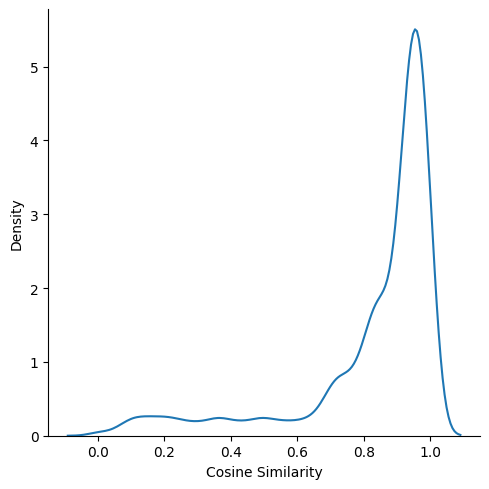

In [50]:
sns.displot(same_peptide_cosine_scores, x="Cosine Similarity", kind="kde")

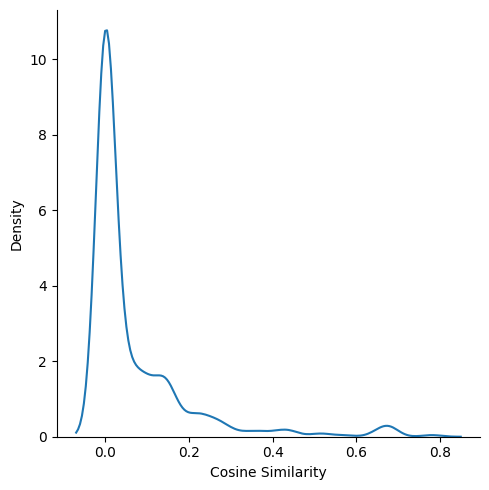

In [51]:
sns.displot(diff_peptide_cosine_scores, x="Cosine Similarity", kind="kde")

In [52]:
diff_peptide_cosine_scores['Cosine Similarity'].describe()

count    6459.000000
mean        0.069705
std         0.133494
min         0.000000
25%         0.000000
50%         0.000000
75%         0.093195
max         0.780336
Name: Cosine Similarity, dtype: float64

In [53]:
stats.ttest_ind(diff_peptide_cosine_scores['Cosine Similarity'], same_peptide_cosine_scores['Cosine Similarity'], equal_var=False)

Ttest_indResult(statistic=-167.38863916526392, pvalue=0.0)

In [55]:
# plotting them on the same graph
same_peptide_cosine_scores['Same/Different'] = 'Same'
diff_peptide_cosine_scores['Same/Different'] = 'Different'

data = pd.concat([same_peptide_cosine_scores.sample(len(diff_peptide_cosine_scores)), diff_peptide_cosine_scores])

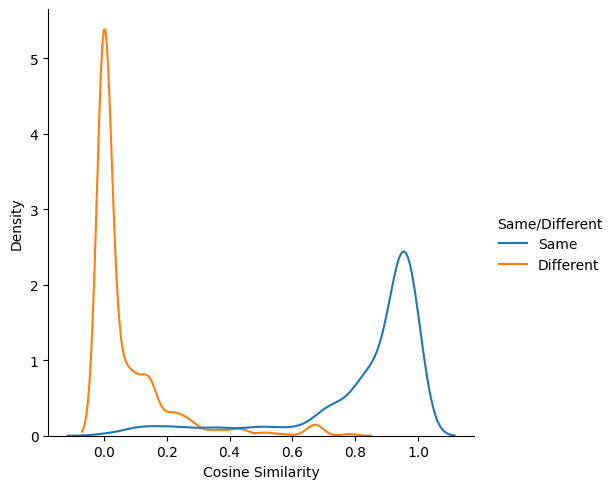

In [56]:
sns.displot(data, x="Cosine Similarity", kind="kde", hue='Same/Different')

In [24]:
def get_cosine_similarity(array1, array2) :
    return cosine_similarity(np.array([list(array1), list(array2)]))[0,1]

In [38]:
# not sure what this is, probably don't need it
########################### from here to next big comment, you can probably ignore it. Just me trying to do some old cosine similarity stuff #####################

orig_and_exemplar_cos_sim = []
for chimeric_index, scan in file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), ['Chimeric Index', 'Scan']].values :
    file1_orig = file1_scans[chimeric_index]
    file1_orig.m_z = bin_m_z(file1_orig)
    file1_orig.m_z, file1_orig.intensity = combine_duplicates(file1_orig)
    file1_orig_intensity = np.zeros(len(unique_m_zs))
    file1_orig_indexes = np.where(np.isin(np.array(unique_m_zs), np.array(file1_orig.m_z)))[0] # potential problem, what if chimeric spectra 
                                                                              # has m_z values that didn't occur in the original spectra? 
    file1_orig_intensity[file1_orig_indexes] = file1_orig.intensity

    file1_alt_intensity = np.zeros(len(unique_m_zs))
    scan.m_z = bin_m_z(scan)
    scan.m_z, scan.intensity = combine_duplicates(scan)
    file1_indexes = np.where(np.isin(np.array(unique_m_zs), np.array(scan.m_z)))[0]
    file1_alt_intensity[file1_indexes] = scan.intensity

    orig_and_exemplar_cos_sim.append(get_cosine_similarity(file1_orig_intensity, file1_alt_intensity))

    

In [39]:
orig_and_exemplar_cos_sim = pd.DataFrame({'Cosine Similarity': orig_and_exemplar_cos_sim})
orig_and_exemplar_cos_sim['Cosine Similarity'].describe()

count    1607.000000
mean        0.059132
std         0.084618
min         0.000000
25%         0.005772
50%         0.030110
75%         0.078962
max         0.818759
Name: Cosine Similarity, dtype: float64

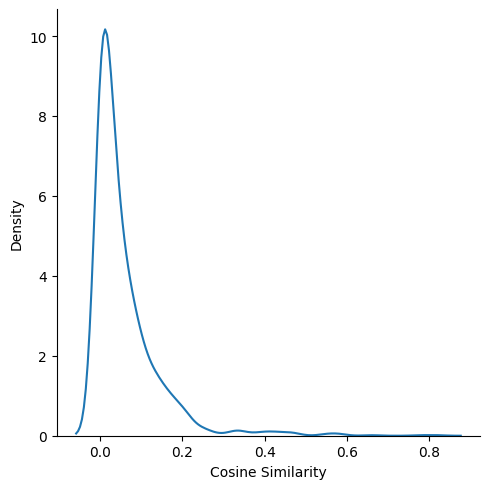

In [40]:
sns.displot(orig_and_exemplar_cos_sim, x="Cosine Similarity", kind="kde")

In [17]:
# me trying to see how similar the insert exemplar is to the insert
series1_alt_scan_intensity = np.zeros(len(unique_m_zs))
series1_alt_scan.m_z = bin_m_z(series1_alt_scan)
series1_alt_scan.m_z, series1_alt_scan.intensity = combine_duplicates(series1_alt_scan)
indexes = np.where(np.isin(np.array(unique_m_zs), np.array(series1_alt_scan.m_z)))[0]
series1_alt_scan_intensity[indexes] = series1_alt_scan.intensity

series1_scan_intensity = np.zeros(len(unique_m_zs))
series1_scans[0].m_z = bin_m_z(series1_scans[0])
series1_scans[0].m_z, series1_scans[0].intensity = combine_duplicates(series1_scans[0])
indexes = np.where(np.isin(np.array(unique_m_zs), np.array(series1_scans[0].m_z)))[0]
series1_scan_intensity[indexes] = series1_scans[0].intensity

In [18]:
# me trying to see how similar the insert exemplar is to the insert
cosine_similarity([series1_alt_scan_intensity, series1_scan_intensity])

array([[1.        , 0.47590257],
       [0.47590257, 1.        ]])

In [58]:
######################## the main code cell for NNLS ###################################################

insert_alt_scan_intensity = get_intensity(series1_alt_scan, insert_peptide)

for chimeric_index, scan, peptide in file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), ['Chimeric Index', 'Scan', 'Peptide']].values :
    chimeric_scan = chimeric_scans[chimeric_index]
    chimeric_intensity = get_intensity(chimeric_scan)
    file1_intensity = get_intensity(scan, peptide)
    file1_decoy_intensities = []
    insert_decoy_intensities = []
    for decoy_scan, pep in zip(decoy_scans[chimeric_index][0], decoy_scans[chimeric_index][1]) :
        file1_decoy_intensities.append(get_intensity(decoy_scan))
    for i, decoy_scan in enumerate(decoy_scans_for_insert) :
        insert_decoy_intensities.append(get_intensity(decoy_scan, insert_decoy_peptides[i+1]))
    A_cols = [file1_intensity] + file1_decoy_intensities + insert_decoy_intensities + [insert_alt_scan_intensity] 
    A = np.column_stack(A_cols)
    newA = A[~np.all(A == 0, axis=1)] # removes rows where it's all zeros
    # print(np.linalg.cond(newA)) # condition number, we want it to be small like < 50
    # print(newA.shape)
    b = chimeric_intensity
    newb = b[~np.all(A == 0, axis=1)]
    model = LinearRegression(fit_intercept=False, positive=True) # can also do: coef, residual = scipy.optimize.nnls(newA, newb)
    model.fit(newA, newb)
    print(model.coef_)

[0.53204105 0.13333487 0.57028885 0.00936921 3.98933878]
[2.49232634 0.         0.59665227 3.83654891]
[0.         3.89102817]
[0.         1.99105129 3.56693043]
[1.13046078 0.25630282 3.87636783]
[1.16395108 3.89102817]
[1.03840269 0.03500074 0.04705694 0.32406616 3.92592855]
[0.35026345 6.32952912 3.2730658 ]
[0.65005934 3.8879079 ]
[1.23231022 0.01788688 3.89012126]
[0.59218342 3.92444227]
[0.75940459 0.23681974 0.27434983 1.55775355 3.82249157]
[1.86224393 0.12923062 3.93651266]
[1.10434191 3.89102817]
[1.0056223  0.50770909 0.02561211 0.42042374 1.37523575 3.79077828]
[2.28861615 1.77378469 3.75495958]
[0.79201697 3.92330911]
[0.76672869 3.92200384]
[1.85067534 0.7543381  3.73656032]
[1.28110106 3.99287316]
[0.25836773 0.         0.01301268 0.         1.62305825 3.89002203]
[0.76413914 3.89102817]


KeyboardInterrupt: 

In [21]:
# old code, hasn't been updated with removing non annontated peaks 
# computes the cosine similarity of combined exemplars against the chimeric (target, half decoy, full decoy)

series1_alt_scan_intensity = get_intensity(series1_alt_scan)

correct_scores = []
correct_coefficients = []
one_wrong_scores = []
one_wrong_coefficients = []
bad_scores = []
bad_coefficients = []

correct_cosine_similarities = []
one_wrong_cosine_similarities = []
two_wrong_cosine_similarities = []

i = 0
for chimeric_index, scan in file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), ['Chimeric Index', 'Scan']].values :
    chimeric_scan = chimeric_scans[chimeric_index]
    chimeric_intensity = get_intensity(chimeric_scan)
    file1_intensity = get_intensity(scan)

    ###################################
    # for m_z in chimeric_scan.m_z :
    #     if m_z in scan.m_z :
    #         scan.intensity[scan.m_z.index(m_z)] = chimeric_scan.intensity[chimeric_scan.m_z.index(m_z)]
    #     if m_z in series1_alt_scan.m_z :
    #         series1_alt_scan.intensity[series1_alt_scan.m_z.index(m_z)] = chimeric_scan.intensity[chimeric_scan.m_z.index(m_z)]
    
    # series1_alt_scan_intensity[indexes] = series1_alt_scan.intensity
    # file1_intensity[file1_indexes] = scan.intensity
    ####################################

    A = pd.DataFrame({series1_scans[0].title: series1_alt_scan_intensity,
                      scan.title: file1_intensity}, index=unique_m_zs)
    b = chimeric_intensity
    model = LinearRegression(fit_intercept=False, positive=True)
    model.fit(A, b)
    correct_scores.append(np.linalg.norm(model.predict(A)-b))
    correct_coefficients.append(model.coef_)
    correct_cosine_similarities.append(get_cosine_similarity(chimeric_intensity, series1_alt_scan_intensity + file1_intensity))

    if i >= 1 :
        A = pd.DataFrame({'one_ago': one_ago, 
                          'current':file1_intensity}, index=unique_m_zs)
        b = np.array(chimeric_intensity)
        model = LinearRegression(fit_intercept=False, positive=True)
        model.fit(A, b)
        one_wrong_scores.append(np.linalg.norm(model.predict(A)-b))
        one_wrong_coefficients.append(model.coef_)
        one_wrong_cosine_similarities.append(get_cosine_similarity(chimeric_intensity, one_ago + file1_intensity))

    if i >= 2 :
        A = pd.DataFrame({'one_ago': one_ago,
                          'two_ago': two_ago}, index=unique_m_zs)
        b = np.array(chimeric_intensity)
        model = LinearRegression(fit_intercept=False, positive=True)
        model.fit(A, b)
        bad_scores.append(np.linalg.norm(model.predict(A)-b))
        bad_coefficients.append(model.coef_)
        two_wrong_cosine_similarities.append(get_cosine_similarity(chimeric_intensity, one_ago + two_ago))


    if i >= 1 :
        two_ago = one_ago
    one_ago = file1_intensity

    i += 1

    if i % 70 == 0 : 
        print(i/len(file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), 'Scan']))

0.045992115637319315
0.09198423127463863
0.13797634691195795
0.18396846254927726
0.22996057818659657
0.2759526938239159
0.3219448094612352
0.3679369250985545
0.41392904073587383
0.45992115637319314
0.5059132720105125
0.5519053876478318
0.5978975032851511
0.6438896189224704
0.6898817345597897
0.735873850197109
0.7818659658344284
0.8278580814717477
0.873850197109067
0.9198423127463863
0.9658344283837057


In [24]:
#################### from here on out data analysis, gets less and less useful #########################################

master = pd.DataFrame({'Correct Residual': correct_scores[:len(bad_scores)],
                       'Correct Cosine Similarity': correct_cosine_similarities[:len(bad_scores)],
                       'OW Residual': one_wrong_scores[:len(bad_scores)],
                       'OW Cosine': one_wrong_cosine_similarities[:len(bad_scores)],
                       'TW Residaul': bad_scores,
                       'TW Cosine': two_wrong_cosine_similarities})

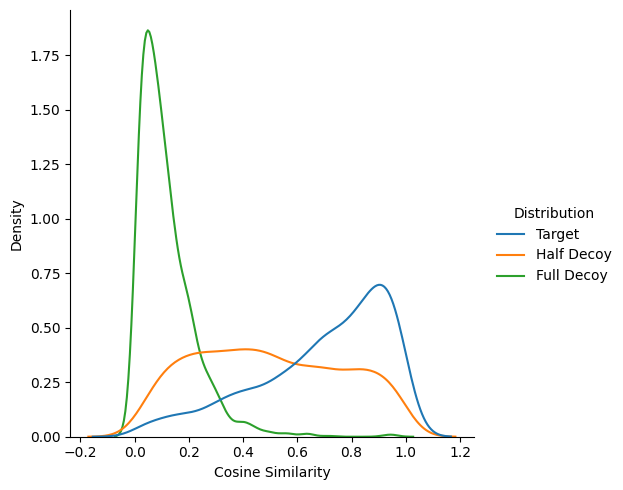

In [22]:
correct = pd.DataFrame({'Cosine Similarity': correct_cosine_similarities})
ow = pd.DataFrame({'Cosine Similarity': one_wrong_cosine_similarities})
tw = pd.DataFrame({'Cosine Similarity': two_wrong_cosine_similarities})

correct['Distribution'] = 'Target'
ow['Distribution'] = 'Half Decoy'
tw['Distribution'] = 'Full Decoy'

data = pd.concat([correct, ow, tw])

sns.displot(data, x="Cosine Similarity", kind="kde", hue='Distribution')

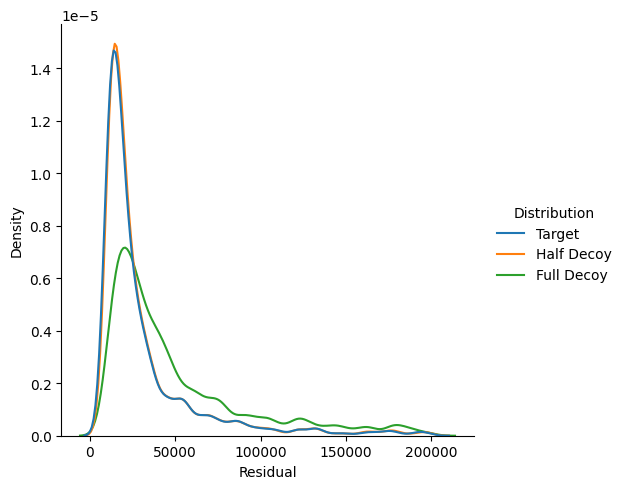

In [23]:
correct = pd.DataFrame({'Residual': correct_scores})
ow = pd.DataFrame({'Residual': one_wrong_scores})
tw = pd.DataFrame({'Residual': bad_scores})

correct = correct[correct['Residual'] < 200000]
ow = ow[ow['Residual'] < 200000]
tw = tw[tw['Residual'] < 200000]

correct['Distribution'] = 'Target'
ow['Distribution'] = 'Half Decoy'
tw['Distribution'] = 'Full Decoy'

data = pd.concat([correct, ow, tw])

sns.displot(data, x="Residual", kind="kde", hue='Distribution', bw_adjust = 0.5)

In [171]:
corr_coefficients = [l[i] for i in range(2) for l in correct_coefficients]
one_wrong_coefficients = [l[i] for i in range(2) for l in one_wrong_coefficients]
bad_coefficients = [l[i] for i in range(2) for l in bad_coefficients]

In [173]:
c_sum_coef = [corr_coefficients[i] + corr_coefficients[i+1] for i in range(0,len(corr_coefficients), 2)]
ow_sum_coef = [one_wrong_coefficients[i] + one_wrong_coefficients[i+1] for i in range(0, len(one_wrong_coefficients), 2)]
tw_sum_coef = [bad_coefficients[i] + bad_coefficients[i+1] for i in range(0, len(bad_coefficients), 2)]

(-0.3, 1.5)

<Figure size 640x480 with 0 Axes>

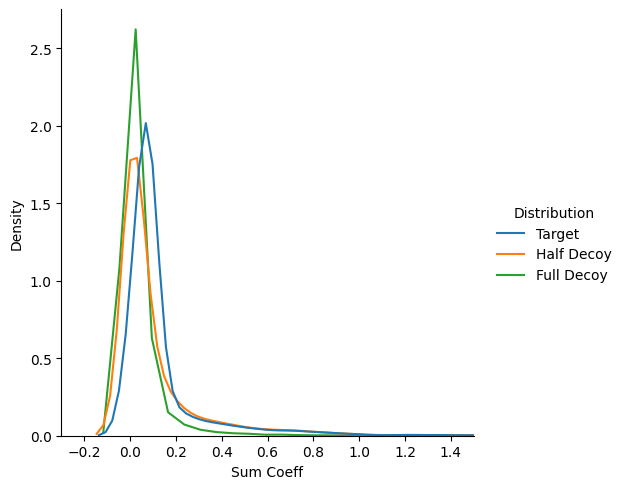

In [180]:
c = pd.DataFrame({'Sum Coeff': corr_coefficients})
o = pd.DataFrame({'Sum Coeff': one_wrong_coefficients})
t = pd.DataFrame({'Sum Coeff': bad_coefficients})

c['Distribution'] = 'Target'
o['Distribution'] = 'Half Decoy'
t['Distribution'] = 'Full Decoy'

data = pd.concat([c, o, t])

plt.clf()
sns.displot(data, x="Sum Coeff", kind="kde", hue='Distribution')
plt.xlim(-.3, 1.5)

In [183]:
sum_coeff = pd.DataFrame({'Target Coeff Sum': c_sum_coef[:len(tw_sum_coef)],
                          'Half Decoy Coeff Sum': ow_sum_coef[:len(tw_sum_coef)],
                          'Full Decoy Coeff Sum': tw_sum_coef})

In [185]:
stats.ttest_ind(c_sum_coef, ow_sum_coef)

Ttest_indResult(statistic=4.690764024577512, pvalue=2.7781230595321764e-06)

In [186]:
stats.ttest_ind(ow_sum_coef, tw_sum_coef)

Ttest_indResult(statistic=15.536461272123683, pvalue=1.8258712711745468e-53)

In [184]:
sum_coeff.describe()

,Target Coeff Sum,Half Decoy Coeff Sum,Full Decoy Coeff Sum
count,3215.000000,3215.000000,3215.000000
mean,0.275049,0.228635,0.085876
std,0.380027,0.412439,0.319171
min,0.000000,0.000000,0.000000
25%,0.155507,0.018365,0.007124
50%,0.155507,0.076065,0.028206
75%,0.228555,0.261938,0.081455
max,5.586495,5.585948,13.836475


In [169]:
correct_coefficients

[array([0.07775328, 0.26701122]),
 array([0.07775328, 0.0146772 ]),
 array([0.07775328, 0.1278801 ]),
 array([0.07775328, 0.00064681]),
 array([0.07775328, 0.00188846]),
 array([0.07775328, 0.        ]),
 array([0.07775328, 0.09371569]),
 array([0.07775328, 0.05884897]),
 array([0.07775328, 0.11736706]),
 array([0.07775328, 3.63985288]),
 array([0.07775328, 0.        ]),
 array([0.07775328, 0.01778884]),
 array([0.07775328, 0.35588858]),
 array([0.07775328, 0.06219178]),
 array([0.07775328, 0.        ]),
 array([0.07775328, 0.20122591]),
 array([0.07775328, 0.12713871]),
 array([0.07775328, 0.04019345]),
 array([0.07775328, 0.02774822]),
 array([0.07775328, 0.00100847]),
 array([0.07775328, 0.01256007]),
 array([0.07775328, 0.19684404]),
 array([0.07775328, 0.13554539]),
 array([0.07775328, 0.67068669]),
 array([0.07775328, 0.02310166]),
 array([0.07775328, 0.        ]),
 array([0.07775328, 0.07714273]),
 array([0.07775328, 0.18146222]),
 array([0.07775328, 0.19293281]),
 array([0.0777

In [156]:
master.describe()

,Correct Residual,Correct Cosine Similarity,OW Residual,OW Cosine,TW Residaul,TW Cosine
count,3.215000e+03,3215.000000,3.215000e+03,3215.000000,3.215000e+03,3215.000000
mean,7.594160e+04,0.144557,7.589604e+04,0.113244,7.945079e+04,0.030250
std,1.612852e+05,0.185349,1.611996e+05,0.158650,1.649510e+05,0.050118
min,8.840461e+03,0.000040,8.869601e+03,0.000000,8.869975e+03,0.000000
25%,2.175703e+04,0.023154,2.174334e+04,0.016098,2.227104e+04,0.004023
50%,3.597580e+04,0.066184,3.598297e+04,0.049658,3.701014e+04,0.014188
75%,6.936041e+04,0.187080,6.936177e+04,0.141516,7.291358e+04,0.037006
max,3.471636e+06,0.988738,3.471636e+06,0.976971,3.476174e+06,0.739085


In [160]:
stats.ttest_ind(correct_cosine_similarities, one_wrong_cosine_similarities)

Ttest_indResult(statistic=7.3186875864260665, pvalue=2.8093390550471873e-13)

In [161]:
stats.ttest_ind(correct_cosine_similarities, two_wrong_cosine_similarities)

Ttest_indResult(statistic=33.752251375917304, pvalue=4.555964508358174e-230)

In [162]:
stats.ttest_ind(one_wrong_cosine_similarities, two_wrong_cosine_similarities)

Ttest_indResult(statistic=28.2773599453198, pvalue=6.621882371574008e-166)

In [131]:
np.average(two_wrong_cosine_similarities)

0.0012196019100615652

In [127]:
np.average(one_wrong_cosine_similarities)

0.0847278071968053

In [126]:
np.average(correct_cosine_similarities)

0.12193742119995898

In [81]:
correct_coefficients = [arr[i] for i in range(2) for arr in correct_coefficients]

In [76]:
stats.ttest_ind(correct_scores, bad_scores)

Ttest_indResult(statistic=-0.6742973679743453, pvalue=0.5097481673863057)

In [83]:
stats.ttest_ind(correct_coefficients, bad_coefficients)

Ttest_indResult(statistic=1.5192798337240683, pvalue=0.13793748938654712)

In [82]:
bad_coefficients = [arr[i] for i in range(2) for arr in bad_coefficients]

In [70]:
series1_scan = series1_scans[0]
series1_scan_intensity = np.zeros(len(unique_m_zs))
series1_scan.m_z = [float(i) for i in series1_scan.m_z]
series1_scan.intensity = [float(i) for i in series1_scan.intensity]
indexes = np.where(np.isin(np.array(unique_m_zs), np.array(series1_scan.m_z)))[0]
series1_scan_intensity[indexes] = series1_scan.intensity

correct_scores = []
correct_coefficients = []
one_wrong_scores = []
one_wrong_coefficients = []
bad_scores = []
bad_coefficients = []

i = 0
for chimeric_index, scan in enumerate(file1_scans) :
    chimeric_scan = chimeric_scans[chimeric_index]
    chimeric_scan.m_z, chimeric_scan.intensity = combine_duplicates(chimeric_scan)
    chimeric_intensity = np.zeros(len(unique_m_zs))
    indexes = np.where(np.isin(np.array(unique_m_zs), np.array(chimeric_scan.m_z)))[0] # potential problem, what if chimeric spectra 
                                                                              # has m_z values that didn't occur in the original spectra? 
    chimeric_intensity[indexes] = chimeric_scan.intensity

    file1_intensity = np.zeros(len(unique_m_zs))
    scan.m_z = [float(i) for i in scan.m_z]
    scan.intensity = [float(i) for i in scan.intensity]
    indexes = np.where(np.isin(np.array(unique_m_zs), np.array(scan.m_z)))[0]
    file1_intensity[indexes] = scan.intensity

    A = pd.DataFrame({series1_alt_scan.title: series1_scan_intensity,
                      scan.title: file1_intensity}, index=unique_m_zs)
    b = np.array(chimeric_intensity)
    model = LinearRegression(fit_intercept=False, positive=True)
    model.fit(A, b)
    correct_scores.append(np.linalg.norm(model.predict(A)-b))
    correct_coefficients.append(model.coef_)

    if i >= 1 :
        A = pd.DataFrame({'one_ago': one_ago, 
                          'current':series1_scan_intensity}, index=unique_m_zs)
        b = np.array(chimeric_intensity)
        model = LinearRegression(fit_intercept=False, positive=True)
        model.fit(A, b)
        one_wrong_scores.append(np.linalg.norm(model.predict(A)-b))
        one_wrong_coefficients.append(model.coef_)

    if i >= 2 :
        A = pd.DataFrame({'one_ago': one_ago,
                          'two_ago': two_ago}, index=unique_m_zs)
        b = np.array(chimeric_intensity)
        model = LinearRegression(fit_intercept=False, positive=True)
        model.fit(A, b)
        bad_scores.append(np.linalg.norm(model.predict(A)-b))
        bad_coefficients.append(model.coef_)


    if i >= 1 :
        two_ago = one_ago
    one_ago = file1_intensity

    i += 1

    if i % 10 == 0 : 
        print(i/len(file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), 'Scan']))
        break

0.0014302059496567505


In [63]:
correct_coefficients

[array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.])]

In [71]:
one_wrong_coefficients

[array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.])]

In [65]:
bad_coefficients

[array([0., 0.]),
 array([0., 0.]),
 array([0., 0.]),
 array([0., 0.]),
 array([0., 0.]),
 array([0., 0.]),
 array([0., 0.]),
 array([0., 0.])]

In [67]:
correct_scores

[6.561468513030565e-10,
 1.6900763452347867e-12,
 1.6900763452347867e-12,
 4.0065538511739974e-12,
 3.15672954841712e-12,
 2.893994419845934e-12,
 1.6900763452347867e-12,
 1.6900763452347867e-12,
 2.3656698484370296e-12,
 1.6572172098571638e-11]

In [72]:
one_wrong_scores

[3754.03463933073,
 9539.947759648798,
 8660.006969899163,
 5829.529883677667,
 12151.436579287227,
 261421.56382426506,
 7379.988665500161,
 8495.963148206692,
 35198.86458342183]

In [73]:
bad_scores

[12247.490341327111,
 11575.238102206573,
 9642.294077073344,
 14375.250514148001,
 261534.36571266953,
 10651.509240806374,
 11453.026072604518,
 36027.0798756455]

In [ ]:
np.linalg.norm(model.predict(A)-b) # how to get the residual